In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
# Specify known values of prior and actual data.
prior_a = 100
prior_b = 1
actual_data_Z = 8
actual_data_N = 12

In [3]:
# Compute posterior parameter values.
post_a = prior_a + actual_data_Z
post_b = prior_b + actual_data_N - actual_data_Z

In [4]:
# Number of flips in a simulated sample should match the actual sample size:
sim_sample_size = actual_data_N

In [5]:
# Designate an arbitrarily large number of simulated samples.
n_sim_samples = 1000

In [6]:
# Set aside a vector in which to store the simulation results.
sim_sample_Z_record = np.zeros(n_sim_samples)

In [7]:
# Now generate samples from the posterior.
for sample_idx in range(0, n_sim_samples):
    # Generate a theta value for the new sample from the posterior.
    sample_theta = beta.rvs(post_a, post_b)
    # Generate a sample, using sample_theta.
    sample_data = np.random.choice([0, 1], p=[1-sample_theta, sample_theta],
                                  size=sim_sample_size, replace=True)
    sim_sample_Z_record[sample_idx] = sum(sample_data)

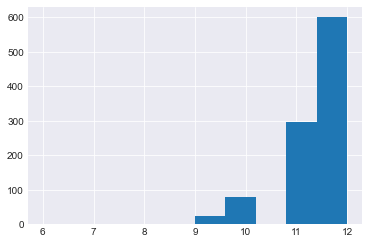

In [8]:
## Make a histogram of the number of heads in the samples.
plt.hist(sim_sample_Z_record)
plt.show()